In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from PIL import Image # 图像的读写显的库
from mpl_toolkits.mplot3d import Axes3D
from time import time
from scipy import misc

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin # 计算点与点直接的最小距离，然后将最小距离的点组成一个key/value的键值对
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [3]:
## 解决展示的时候中文乱码
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

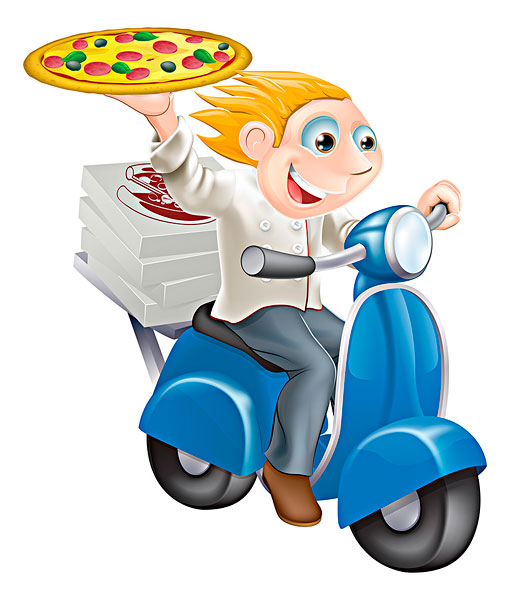

In [4]:
n_colors = 64
image = Image.open('datas/xiaoren.png') 
image

In [5]:
## 读取图片，加载图片数据
image = Image.open('datas/xiaoren.png')  
#将数据转换为RGB的百分比
image = np.array(image, dtype=np.float64) / 255
# print(image)
print(image.shape)
#获取图片数据的维度/形状（长、宽、像素）
original_shape = tuple(image.shape)
print(original_shape)
shape_size = len(original_shape)
# d设置为1是为了黑白图片的显示
w, h, d = original_shape[0], original_shape[1], 1
if shape_size == 3:
    d = original_shape[2]
#将图片数据设置为二维的(将每个像素点当做一个样本)
image_v = np.reshape(image, (w * h, d))
# 因为图像的像素太多，所以随机选择其中的10000个像素点
image_v_sample = shuffle(image_v, random_state=28)[:10000]
image_v_sample

(600, 510, 3)
(600, 510, 3)


array([[ 1.        ,  0.71372549,  0.04705882],
       [ 1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.4627451 ,  0.66666667],
       ..., 
       [ 0.01960784,  0.37254902,  0.61960784],
       [ 0.31372549,  0.31372549,  0.32156863],
       [ 1.        ,  1.        ,  1.        ]])

In [6]:
#算法构建
t0 = time()
k_means = KMeans(n_clusters=n_colors, random_state=28)
k_means.fit(image_v_sample)
print ("模型构建消耗时间:%.3fs" % (time() - t0))

模型构建消耗时间:1.900s


In [7]:
#进行算法数据预测，得到图片对应的所有的聚类类别信息
t0 = time()
labels = k_means.predict(image_v)
print ("算法模型预测消耗时间:%.3fs" % (time() - t0))

算法模型预测消耗时间:0.316s


In [8]:
#进行随机数据抽取，得到图片对象的聚类的类别信息
t0 = time()
codebook_random = shuffle(image_v, random_state=28)[:n_colors]#随机排序
# 针对image_v中的每个样本(像素)计算在codebook_random中离的最近的那个样本点的下标
labels_random = pairwise_distances_argmin(image_v, codebook_random)#计算一点和一组点之间的最小距离
print ("随机数据预测消耗时间:%.3fs" % (time() - t0))

随机数据预测消耗时间:0.642s


In [9]:
"""
重新构建一个图片数据(压缩图片数据)
codebook：各个类别的具体像素值集合(聚类中心/簇中心/类别中心)，中心点坐标
labels：原始图片各个像素点的类别集合（所对应的codebook中的坐标点的下标值）
w: 原始/新图片宽度
h：原始/新图片高度
"""
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0 # 第几个原始图像的像素点
    for i in range(w):
        for j in range(h):
            # 获取原始数据像素点对应的类别中心点坐标
            # 再根据中心点坐标获取对应的像素值
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


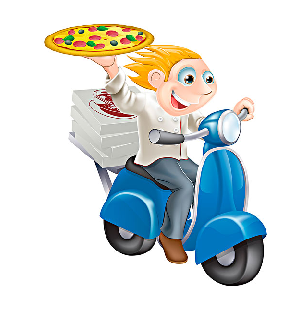

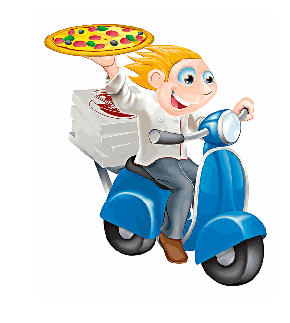

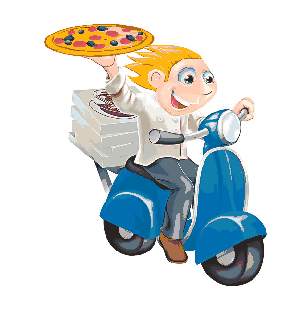

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [11]:
## 图片显示
plt.figure(u"原始图片",facecolor='w')
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
if d == 1:
    plt.imshow(image, cmap=plt.cm.gray)
else:
    plt.imshow(image)

plt.figure(u'K-Means算法压缩图片',facecolor='w')
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
km_image = recreate_image(k_means.cluster_centers_, labels, w, h)
km_image.shape = original_shape
if d == 1:
    plt.imshow(km_image, cmap=plt.cm.gray)
else:
    plt.imshow(km_image)

plt.figure(u'随机抽取像素点压缩图片',facecolor='w')
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
random_image = recreate_image(codebook_random, labels_random, w, h)
random_image.shape = original_shape
if d == 1:
    plt.imshow(random_image, cmap=plt.cm.gray)
else:
    plt.imshow(random_image)
plt.show()

misc.imsave('datas/result_1.png', image)
misc.imsave('datas/result_2.png', km_image)
misc.imsave('datas/result_3.png', random_image)